**Natural Language Processing**

# Bag of Words (BoW) model

A typical Bag of Words (BoW) vector represents a text document as a numerical array, where each element corresponds to the frequency (or presence) of a specific word in the vocabulary.

A structured representation of a BoW vector can look like this:

[**SoS**, **EoS**, ...frequency of words..., **frequency of special words**]

Where:

+ **SoS** (Start of Sentence Token) – Optional. Can be used to indicate the beginning of a sentence.
+ **EoS** (End of Sentence Token) – Optional. Marks the end of a sentence.
+ **frequency of words** – The main part of the vector, representing the frequency or presence of each word in the vocabulary.
+ **frequency of special words** – Can include punctuation, stop words, named entities, or special tokens (e.g., <UNK> for unknown words).

## Step-by-step

### Step 1. Collect and Prepare Text Data
- Gather a set of text documents (e.g., emails, reviews, or news articles).  
- Label the data if needed (e.g., spam vs. not spam).  

### Step 2. Clean and Preprocess the Text
- Convert text to lowercase.  
- Remove punctuation, numbers, and special characters.  
- Remove stop words (common words like "the", "and", "is" that don’t add much meaning).  
- Tokenize the text (split sentences into words).  

### Step 3. Convert Sentences into Vectors using Bag of Words
- Create a vocabulary (a list of all unique words in the dataset).  
- Count how many times each word appears in each document.  
- Represent each document as a vector of word counts.  

### Step 4. Split Data into Training and Testing Sets
- Divide the dataset into a training set (to teach the model) and a test set (to check its accuracy).  

### Step 5. Train a Machine Learning Model
- Use a classification algorithm (e.g., Naive Bayes, Logistic Regression, or SVM) or a neural network.
- Feed the BoW vectors into the model so it learns patterns in the data.  

### Step 6. Test and Evaluate the Model
- Use the test set to check how well the model can predict labels for new text.  
- Measure accuracy and other performance metrics.  

### Step 7. Make Predictions on New Text
- Convert new sentences into BoW vectors.  
- Feed them into the trained model to get predictions.  

## Libraries Loading 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
%cat '../00_data/Restaurant_Reviews.tsv'|head

Review	Liked
Wow... Loved this place.	1
Crust is not good.	0
Not tasty and the texture was just nasty.	0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1
The selection on the menu was great and so were the prices.	1
Now I am getting angry and I want my damn pho.	0
Honeslty it didn't taste THAT fresh.)	0
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0
The fries were great too.	1
cat: stdout: Broken pipe


In [3]:
%cat '../00_data/Restaurant_Reviews.tsv'|tail

The refried beans that came with my meal were dried out and crusty and the food was bland.	0
Spend your money and time some place else.	0
A lady at the table next to us found a live green caterpillar In her salad.	0
the presentation of the food was awful.	0
I can't tell you how disappointed I was.	0
I think food should have flavor and texture and both were lacking.	0
Appetite instantly gone.	0
Overall I was not impressed and would not go back.	0
The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.	0
Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.	0


## Data Loading

In [4]:
# Step 1.
data = pd.read_csv('../00_data/Restaurant_Reviews.tsv', delimiter="\t", quoting=3)
# quoting=3 - ignore quotes

data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [6]:
data.shape

(1000, 2)

## Data Preprocessing

In [7]:
# Step 2.
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # stopwords collection
from nltk.stem.porter import PorterStemmer # to reduce words to their root form

corpus = []

for i in range(0, data.shape[0]):
    review = re.sub("[^a-zA-Z]", " ", data["Review"][i]) # replace all punctuations with space
    review = review.lower() # convert to lowercases
    review = review.split() # split into the words
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    all_stopwords.remove('no')
    review = [ps.stem(word) for word in review if word not in set(all_stopwords)] # stem all the words
    review = ' '.join(review)
    corpus.append(review)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dmitry_luchkin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
corpus[:5]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

## Create Bag of Words model (Create Features)

In [9]:
# Step 3.
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()      # features
y = data.iloc[:, -1].values                 # target

## Split the data into training anf test sets

In [10]:
# Step 4.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train a machine learning model on the training set

### Naive Bayes model

In [11]:
# Step 5.
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [12]:
classifier.epsilon_

np.float64(1.1499374999999932e-10)

## Predicting the test set results

In [13]:
# Step 6.
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1]


## Performance Metrics

### Confusion Matrix

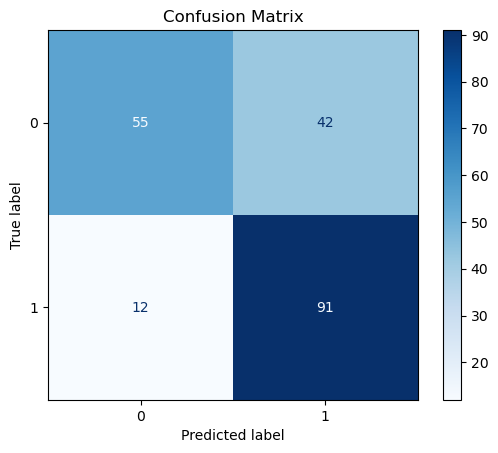

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues,
             colorbar=True)
plt.title("Confusion Matrix")
plt.show()

### Accuracy Score

In [15]:
ac = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {ac*100}%')

Accuracy on test set: 73.0%


## Cross Validation

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    steps=[
        ("nb", GaussianNB())
    ]
)

# Tune the params & CV
param_grid = {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# best params
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {(grid_search.best_score_*100):.2f}%")

# using the best model
y_pred = grid_search.best_estimator_.predict(X_test)
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred)*100}%')

Best Parameters: {'nb__var_smoothing': 1e-05}
Best Cross-Validation Accuracy: 68.00%
Accuracy on test set: 73.5%


## Predict a new result

In [17]:
# Step 7.
best_classifier = grid_search.best_estimator_

In [18]:
def pos_neg_classifier(classifier, new_review):
    # preprocess a new review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    all_stopwords.remove('no')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    # predict
    new_y_pred = classifier.predict(new_X_test)
    
    return new_y_pred

+ **Positive Review:**
  > The food was exceptional, with fresh ingredients and bold flavors. Friendly staff, cozy atmosphere, and quick service made it a delightful experience.

In [19]:
pos_neg_classifier(best_classifier, 
                   new_review='The food was exceptional, with fresh ingredients and bold flavors. ' \
                              'Friendly staff, cozy atmosphere, and quick service made it a delightful experience.')

array([1])

+ **Negative Review:**
  > Disappointing experience—slow service, overpriced dishes, and bland flavors. The ambiance was noisy, and the staff seemed inattentive. Not worth the visit.

In [20]:
pos_neg_classifier(best_classifier, 
                   new_review='Disappointing experience—slow service, overpriced dishes, and bland flavors. ' \
                   'The ambiance was noisy, and the staff seemed inattentive. Not worth the visit.')

array([0])

## The best model selection

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score

random_state = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# models configuration
models_params = {
    'Logistic Regression': {
        'model': Pipeline([
            ('classifier', LogisticRegression(random_state=random_state))
        ]),
        'params': {
            'classifier__class_weight': [None, 'balanced']
        }
    },
    'KNN': {
        'model': Pipeline([
            ('classifier', KNeighborsClassifier())
        ]),
        'params': {
            'classifier__n_neighbors': [3, 5, 7, 10],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    },
    'Support Vector Machine': {
        'model': Pipeline([
            ("classifier", SVC(probability=True, random_state=random_state))
        ]),
        'params': {
            'classifier__class_weight': [None, 'balanced'],
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf', 'poly'],
            'classifier__gamma': ['scale', 'auto']
        }
    },
    'Naive Bayes': {
        'model': Pipeline([
            ("classifier", GaussianNB())
        ]),
        'params': {
            'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
        }
    },
    'Decision Tree': {
        'model': Pipeline([
            ("classifier", DecisionTreeClassifier(random_state=random_state))
        ]),
        'params': {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__class_weight': [None, 'balanced']
        }
    },
    'Random Forest': {
        'model': Pipeline([
            ("classifier", RandomForestClassifier(random_state=random_state))
        ]),
        'params': {
            'classifier__n_estimators': [10, 50, 100, 200],
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__class_weight': [None, 'balanced']
        }
    }
}

cv = KFold(shuffle=True, n_splits=5, random_state=random_state)

f1_scorer = make_scorer(f1_score, pos_label=1)

print('--> Best models searching...')
# searching of the best params for every model on the training set
best_models = {}
for model_name, model_config in models_params.items():
    print(f"Run grid search to find the best params for {model_name}...")
    grid_search = GridSearchCV(model_config['model'],
                               model_config['params'],
                               cv = cv,
                               scoring=f1_scorer)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"The best model for {model_name}: {grid_search.best_params_}")

print('--> Best models evaluating...')
# evaluation of every model on the testing set
test_scores = {}
for model_name, best_model in best_models.items():
    # test the model
    y_pred = best_model.predict(X_test)
    # Predict probabilities for the positive class
    y_scores = best_model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_scores)
    cm = confusion_matrix(y_test, y_pred)
    
    test_scores[model_name] = {'f1': f1, 'roc-auc': roc_auc}
    
    print(f"{model_name}: F1-score = {f1:.4f}, ROC-AUC = {roc_auc:.4f}\n{cm}")
    
    

--> Best models searching...
Run grid search to find the best params for Logistic Regression...
The best model for Logistic Regression: {'classifier__class_weight': None}
Run grid search to find the best params for KNN...
The best model for KNN: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5}
Run grid search to find the best params for Support Vector Machine...
The best model for Support Vector Machine: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Run grid search to find the best params for Naive Bayes...
The best model for Naive Bayes: {'classifier__var_smoothing': 1e-07}
Run grid search to find the best params for Decision Tree...
The best model for Decision Tree: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': None}
Run grid search to find the best params for Random Forest...
The best model for Random Forest: {'classifier__class_weight': 'balance